<a href="https://colab.research.google.com/github/ACTH-DKES/ACTH2025/blob/main/week3/Week3_with_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Recursion, Divide and Conquer Algorithms, Dynamic Programming and APIs

Part of the content of this class has been adapted from the following chapters of the computational thinking book by Silvio Peroni: [8](https://comp-think.github.io/book/08.pdf), [9](https://comp-think.github.io/book/09.pdf), [10](https://comp-think.github.io/book/10.pdf) released under the CCBY 4.0 license http://creativecommons.org/licenses/by/4.0/



## Recursion

Recursion, in computer science, is used when the solution to a computational problem can be reached by combining partial solutions of smaller problems of the same type.

Once the problem reaches a "basic case", then a "basic solution" is returned.

An algorithm can be defined recursive if it has (at least) one basic case and (at least) one recursive step.

An example of recursion could be exponentiation. In fact, an exponentiation is a multiplication of a number to itself x times (X being the exponent).
For instance 9^3 can be written as 9 * 9 * 9.
However, it calso be written as 9 * 9^2, which can then be written as 9 * 9 * 9^1, or also 9 * 9 * 9 * 9^0. 9^0 can be considered as a base case, because every number^0 = 1. So we can say that x^y where y is more than 0 is like saying x * x^(y-1). Writing this is a recursive way:

In [ ]:
def exponentiation(x, y):
    if y == 0: # Base case
        return 1 # Base solution
    else:
        return x * exponentiation(x, y-1) # recursive step

exponentiation(9,4) == 9**4 # there is a built in way in python for
# exponentiation

## Flashback to week 1 exercise



```python
def text_to_tuples(sentence, integer):
    result = []
    words = sentence.split()
    number_of_divisions = len(words)//integer
    if len(words) % integer != 0:
        number_of_divisions += 1
    words.reverse()
    for i in range(number_of_divisions):
        temp_list = []
        for i in range(integer):
            if len(words) != 0:
                temp_list.append(words.pop())
        result.append(tuple(temp_list))
    return result


text_to_tuples("Hi My Life Is So Great After Programming", 3)
```

Can you try to rewrite this algorithm using recursion?

What is the base case?
<details><summary>Hint</summary>
(you still have to make the word list) If the length of the word list is less or equal to the integer</details>
What is the base solution?
<details><summary>Hint2</summary>
Returning a list in which there is a tuple version of the word list</details>
What is the recursive step?
<details><summary>Hint3</summary>
Creating a list where you put a tuple of the words list until the index of the integer. Recreating the sentence string starting from the integer index in the word list. Extending the created list with the calling of the function for the recreated sentence</details>

<details><summary>Full Solution</summary>
<pre><code>
def text_to_tuple_r(sentence, integer):
    words = sentence.split()
    if len(words) <= integer:
        result = [tuple(words)]
        return result
    result = [tuple(words[:integer])]
    new_sentence = " ".join(words[integer:])
    result.extend(text_to_tuple_r(new_sentence, integer))
    return result

print(text_to_tuple_r("Hi My Name Is Bruno", 2))
</pre></code>
</details>

## Divide and conquer algorithms

It is a methodology of algorithms that involves 4 main steps.

1. [base case] address the problem directly on the input material if it is depicting an
easy-to-solve problem; otherwise
2. [divide] split the input material into two or more balanced parts, each representing a
sub-problem of the original one;
3. [conquer] run the same algorithm recursively for every balanced part obtained in the
previous step;
4. [combine] reconstruct the final solution of the problem using the partial solutions
obtained from running the algorithms on the smaller parts of the input material.


### Fibonacci Sequence

The Fibonacci sequence was introduced by Leonardo da Pisa (or Fibonacci).

It is a in infinite sequence of numbers. To find a number in a specific position in the fibonacci sequence (for instance fib(4)) you can follow three main rules.

fib(0) always equals 0

fib(1) always equals 1

fib(n) where n is a positive number and it is neither 1 or 0 always equals (fib(n-2) + (fib(n-1))

As to say, in the fibonacci sequence, one number is always equal to the sum of the two previous numbers in the sequence.

0,1,1,2,3,5,8,13...

Let's apply the divide and conquer to calculate Fibonacci

In [ ]:
def fib(n):
    if n == 0: #base case 1
        return 0 #base solution 1
    elif n == 1: #base case 2
        return 1 #base solution 2
    else:
        return fib(n-2) + fib(n-1) # divide and conquer recursive step

However we can notice this
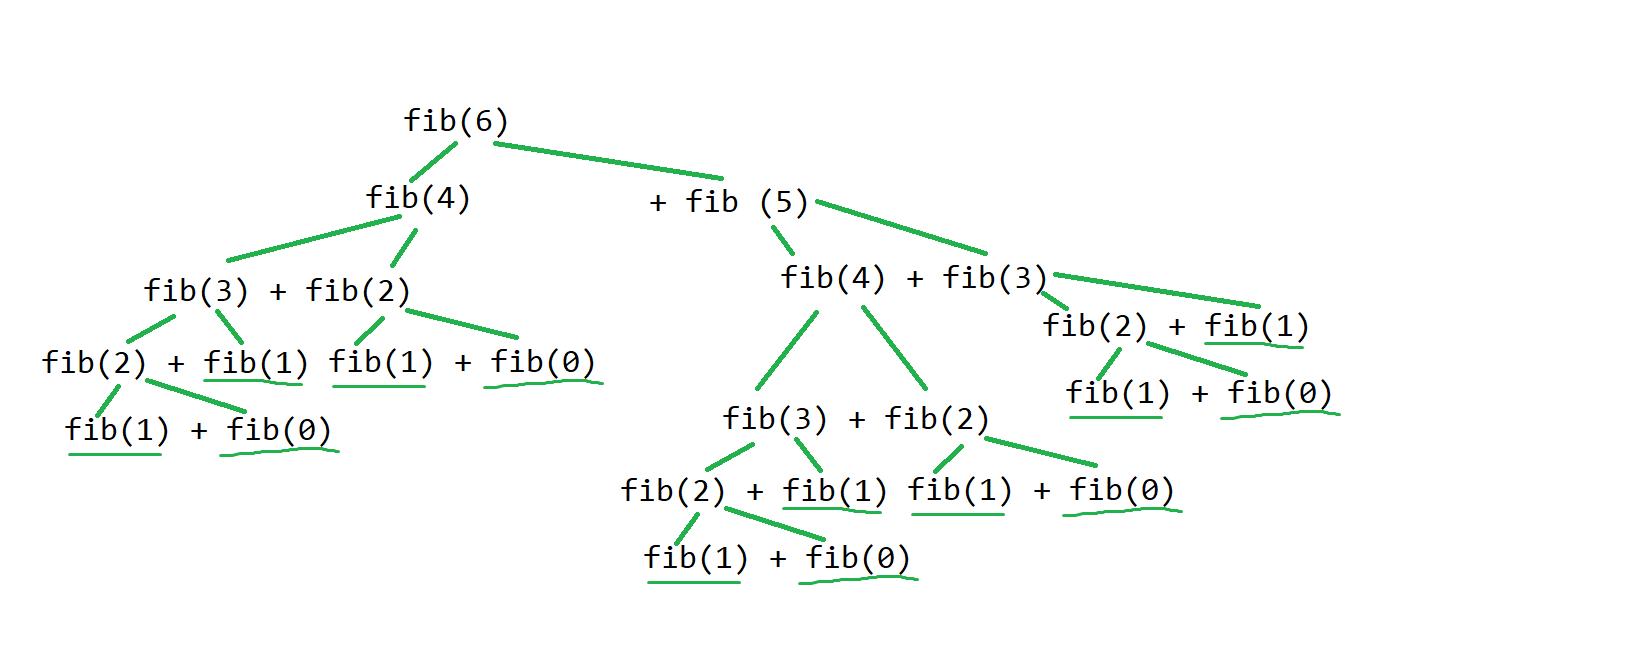

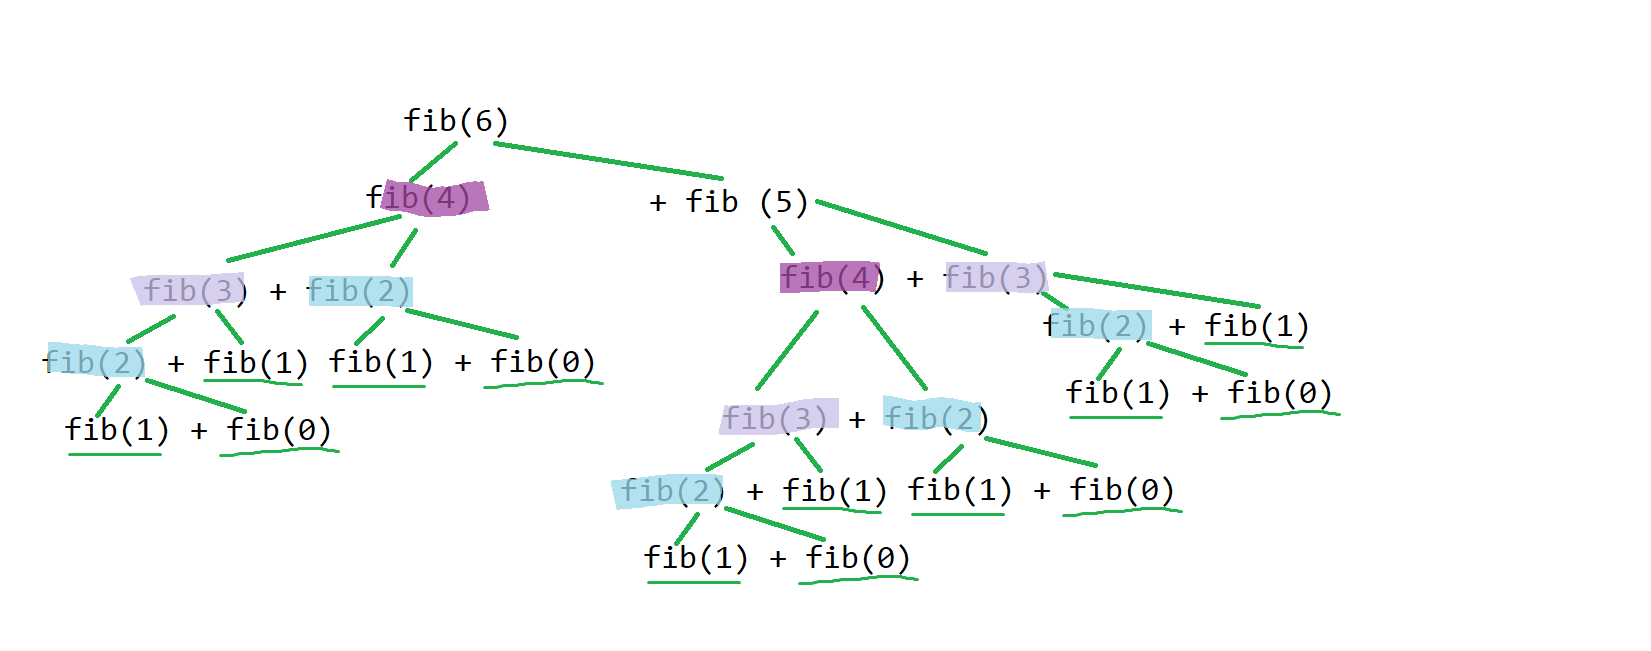

Meaning that some steps are repeated many times in the recursion, and this could be avoided

## Dynamic Programming

It is a more advanced version of divide and conquer which adds two steps

1. **[base case: solution exists] return the solution calculated previously to the problem if
this is the case; otherwise**
2. [base case: address directly] address the problem directly on the input material if it is
depicting an easy-to-solve problem; otherwise
3. [divide] split the input material into two or more balanced parts, each representing a
sub-problem of the original one;
4. [conquer] run the same algorithm recursively for every balanced part obtained in the
previous step;
5. [combine] reconstruct the final solution of the problem using the partial solutions
obtained from running the algorithms on the smaller parts of the input material;
6. **[memorise] store the solution to the problem to reuse if needed by other recursive calls.**

Basically, we can store intermediate solutions to the problems, so if we run into the same problem again, we do not have to recalculate it, but we can just retrieve the solution


In [ ]:
def fibonacci_dynamic(n, memo={}):
    if n in memo: #base case: solution exists
        return memo[n]
    elif n == 0: # base case: address directly
        memo[n] = 0
    elif n == 1: # base case: address directly
        memo[n] = 1
    else: # divide, conquer, combine, and store
        memo[n] = fibonacci_dynamic(n-1, memo) + fibonacci_dynamic(n-2, memo)
    return memo[n]

fibonacci_dynamic(10)

## APIs

An **API** (Application Programming Interface) allows different software systems to communicate with each other.

In the context of the web, APIs allow you to **programmatically interact** with data and services over HTTP. For example, you can use an API to get weather data, fetch cultural heritage information, or post content to social media — all from Python code.

Most modern APIs use **JSON** (JavaScript Object Notation) to encode their data.

### Requests library to interact with APIs via Python

Python's [`requests`](https://docs.python-requests.org/en/latest/) library is used to send HTTP requests to web servers, so it works well with web APIs.

With `requests`, you can:
- Send different types of HTTP requests like `GET`, `POST`
- Include headers and data in your requests
- Handle and decode responses easily (e.g., `.json()` to parse JSON)

What is the difference between GET and POST?

| Method | Purpose |
|--------|---------|
| `GET`  | Retrieve data (read-only operations, like search queries) |
| `POST` | Send data to the server (e.g., for complex queries or uploading data) |

### Common Parameters of `requests`

#### `requests.get(url, params=None, headers=None)`
- `url`: API endpoint (e.g., `"https://api.artic.edu/api/v1/artworks"`)
- `params`: dictionary of query parameters (appended to the URL as `?key=value`)
- `headers`: dictionary of headers (e.g., authentication tokens or content type)

#### `requests.post(url, data=None, json=None, headers=None)`
- `data`: raw body data (usually for form-encoded or plain text)
- `json`: Python dict automatically encoded as JSON (preferred for APIs)
- `headers`: HTTP headers like `"Content-Type": "application/json"`

### Art institute of Chicago API

Docs: https://api.artic.edu/docs/#quick-start

In [ ]:
import requests

response = requests.get("https://api.artic.edu/api/v1/artworks/129884")
#very simple get request
data = response.json() #turn to json
print(data) #print it
print(data["data"]["artist_id"]) # access one field of the data

In [ ]:
import requests
import json

url = "https://api.artic.edu/api/v1/artworks/search"
headers = {"Content-Type": "application/json"}

para = {
    "q": "cats", # general text query for cats
    "query": {
        "term": {
            "is_public_domain": True #filtering for public domain
        }
    }, "fields": ["id", "title", "artist_display", "description", "image_id"] #retrieve
    #only specific fields
    , "limit": 20 # number of results you want to get
}

response = requests.post(url, headers=headers, data=json.dumps(para))
result = response.json()

# Show how many results and print first artwork title
print(f"Found {len(result['data'])} results.")
if result['data']:
    print("First artwork title:", result['data'][0]['title'])


In [ ]:
# Look at the images
from IPython.display import Image, display

base_url = "https://www.artic.edu/iiif/2/"
image_id = result["data"][0].get("image_id")
if image_id:
    thumbnail_url = f"{base_url}{image_id}/full/843,/0/default.jpg"
    display(Image(url=thumbnail_url))

In [ ]:
# If I want to save the image

# Send a GET request to download the image
response = requests.get(thumbnail_url)

# Save it to a file (in current working directory)
output_path = f"{image_id}.jpg"
with open(output_path, "wb") as f:
    f.write(response.content)

In [ ]:
# More complex queries
url = "https://api.artic.edu/api/v1/artworks/search"
headers = {"Content-Type": "application/json"}

payload = {
    "query": {
        "bool": {
            "must": [
                {"match": {"description": "cat"}} # In the field description
                # there must be the word cat
            ],
            "filter": [
                {"term": {"is_public_domain": True}}
            ]
        }
    }, "fields" : ["id", "title", "artist_display",
                   "description", "artist_id"]
}

response = requests.post(url, headers=headers, json=payload)
result = response.json()

print(f"Found {len(result['data'])} artworks.")
if result["data"]:
    print("First artwork title:", result["data"][0]["title"])


### Dynamic Programming for API Caching
Imagine you have a function that queries the AIC API for artworks with a specific keyword, and you want to use it repeatedly for a long list of keywords — some of which repeat.

**Naive Approach**
You would query the API every time, even for repeated keywords — wasting time and bandwidth.

**Dynamic Programming Approach**
Use memorization (step 6 of DP) to store previous results and reuse them when the same query happens again.

**Note that the Art Institute of Chicago API actually suggests to use API caching to avoid too many requests**

In [ ]:
import requests

# Memorization dictionary
cache = {}

def search_artworks(keyword):
    # Step 1: Check memorized result
    if keyword in cache:
        print(f"Using cached result for '{keyword}'")
        return cache[keyword]

    # Step 2: Easy base case (skip empty keywords)
    if not keyword.strip():
        return []

    # Step 3 & 4: Perform API search (simulate divide + conquer)
    url = "https://api.artic.edu/api/v1/artworks/search"
    headers = {"Content-Type": "application/json"}
    payload = {
        "q": keyword,
        "query": {
            "term": {
                "is_public_domain": True
            }
        }, "fields": ["title"]
    }

    response = requests.post(url, headers=headers, json=payload)
    result = response.json()

    # Step 5: Combine (just return relevant data here)
    artworks = [item["title"] for item in result.get("data")]

    # Step 6: Memorize
    cache[keyword] = artworks
    return artworks


In [ ]:
list_of_keywords = ["cat","dog", "serpent", "cat"]
for el in list_of_keywords:
    search_artworks(el)

In [ ]:
cache

In [17]:
# Pre exercise
import requests
# You can also use the api to get data about artists
response = requests.get("https://api.artic.edu/api/v1/artists/40610")
data = response.json()
print(data)

{'data': {'id': 40610, 'api_model': 'agents', 'api_link': 'https://api.artic.edu/api/v1/agents/40610', 'title': 'Vincent van Gogh', 'sort_title': 'Gogh, Vincent van', 'alt_titles': ['Vincent Van Gogh', 'Vincent-Willem van Gogh', "Fan'gao", 'Fan-kao', "Fan'gu", 'Fan-ku', '文森特·梵高'], 'is_artist': True, 'birth_date': 1853, 'death_date': 1890, 'description': None, 'ulan_id': 500115588, 'suggest_autocomplete_boosted': {'input': ['Vincent van Gogh', 'Gogh, Vincent van', 'Vincent Van Gogh', 'Vincent-Willem van Gogh', "Fan'gao", 'Fan-kao', "Fan'gu", 'Fan-ku', '文森特·梵高'], 'weight': 3}, 'suggest_autocomplete_all': {'input': ['Vincent van Gogh', 'Gogh, Vincent van', 'Vincent Van Gogh', 'Vincent-Willem van Gogh', "Fan'gao", 'Fan-kao', "Fan'gu", 'Fan-ku', '文森特·梵高'], 'weight': 3, 'contexts': {'groupings': ['title']}}, 'source_updated_at': '2019-06-13T14:20:39-05:00', 'updated_at': '2025-03-17T23:25:21-05:00', 'timestamp': '2025-05-14T06:24:32-05:00'}, 'info': {'license_text': 'The data in this respons

In [11]:
data["data"]["title"]

'Benjamin Mulock'

### Exercise

Create a function get_artist_bio(description_word, cached) that calls the Art institute of chicago API and looks for artworks that contain the description word in their "description" field, retrieves the "artist_id" from them and then re-calls the Art institute of Chicago API with every "artist_id" found to extract from the artist API their "title", "birth date", "death date", and "description". You save the results of the artist query in cached so that if an artist is found twice you do not have to run the query twice. Return cached at the end to get the data about every artist. Whenever you are using the cached version, print a message that you are doing so.

Test the function to search for "Van Gogh" in the description

In [25]:
import requests

def get_artist_bio(description_word, cached={}):
    url = "https://api.artic.edu/api/v1/artworks/search"
    headers = {"Content-Type": "application/json"}

    payload = {
        "query": {
            "bool": {
                "must": [
                    {"match": {"description": description_word}}
                ],
                "filter": [
                    {"term": {"is_public_domain": True}}
                ]
            }
        }, "fields" : ["artist_id"] # we only care about the artist id for the second query
    }

    response = requests.post(url, headers=headers, json=payload)
    result = response.json()
    if result["data"]:
        for res in result["data"]:
            id = res["artist_id"]
            if id not in cached:
                artist_url = "https://api.artic.edu/api/v1/artists/" + str(id) # we create the url
                response_art = requests.get("https://api.artic.edu/api/v1/artists/" + str(id))
                data_art = response_art.json()
                cached[id] = {"title":data_art["data"]["title"], "birth_date":data_art["data"]["birth_date"], "death_date":data_art["data"]["death_date"], "description":data_art["data"]["description"]}
            else:
                print(f"Using cached version of artist {id}: {cached[id]['title']}")
    return cached


In [26]:
cached_0 = get_artist_bio("Van Gogh")

Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh


In [27]:
get_artist_bio("Van Gogh", cached_0)

Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 34611: Paul Gauguin
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 40610: Vincent van Gogh
Using cached version of artist 34954: Meindert Hobbema


{40610: {'title': 'Vincent van Gogh',
  'birth_date': 1853,
  'death_date': 1890,
  'description': None},
 34611: {'title': 'Paul Gauguin',
  'birth_date': 1848,
  'death_date': 1903,
  'description': None},
 34954: {'title': 'Meindert Hobbema',
  'birth_date': 1638,
  'death_date': 1709,
  'description': None}}

In [ ]:
§